In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data.csv")

In [3]:
dfp = pd.read_csv("prob_data.csv")

In [4]:
dfp.head()

,agent1,agent1_payoff,agent2,agent2_payoff,n_plays,prob
0,AlwaysDefect,4,AlwaysDefect,4,2,0.75
1,AlwaysDefect,20,AlwaysDefect,20,10,0.90
2,AlwaysDefect,332,AlwaysDefect,332,166,0.99
3,AlwaysDefect,10,RandomAgent,2,2,0.75
4,AlwaysDefect,60,RandomAgent,20,15,0.90


In [5]:
df.head()

,agent1,agent1_payoff,agent2,agent2_payoff,n_plays
0,AlwaysDefect,10,AlwaysDefect,10,5
1,AlwaysDefect,200,AlwaysDefect,200,100
2,AlwaysDefect,400,AlwaysDefect,400,200
3,AlwaysDefect,22,RandomAgent,6,5
4,AlwaysDefect,350,RandomAgent,150,100


In [6]:
df['score_diff'] = df['agent1_payoff'] - df['agent2_payoff']

df['win'] = df['score_diff'] > 0

dfp['score_diff'] = dfp['agent1_payoff'] - dfp['agent2_payoff']

dfp['win'] = dfp['score_diff'] > 0

In [7]:
df[df['win'] == True]

,agent1,agent1_payoff,agent2,agent2_payoff,n_plays,score_diff,win
3,AlwaysDefect,22,RandomAgent,6,5,16,True
4,AlwaysDefect,350,RandomAgent,150,100,200,True
5,AlwaysDefect,709,RandomAgent,297,200,412,True
6,AlwaysDefect,25,AlwaysCoorperate,5,5,20,True
7,AlwaysDefect,500,AlwaysCoorperate,100,100,400,True
8,AlwaysDefect,1000,AlwaysCoorperate,200,200,800,True
9,AlwaysDefect,13,TitforTat,9,5,4,True
10,AlwaysDefect,203,TitforTat,199,100,4,True
11,AlwaysDefect,403,TitforTat,399,200,4,True
12,AlwaysDefect,16,TitforTwoTats,8,5,8,True


In [8]:
agents = list(df['agent1'].unique())

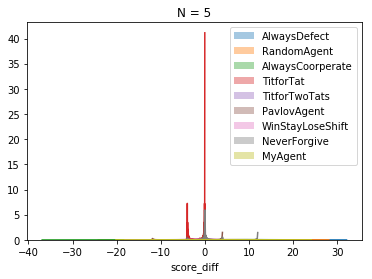

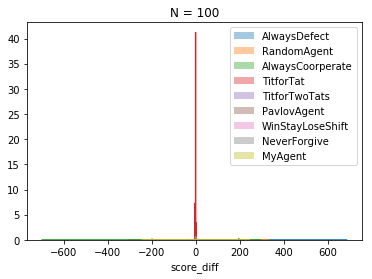

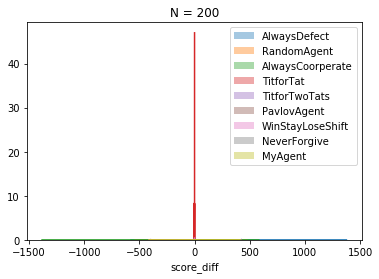

In [9]:
for n_plays in [5, 100, 200]:
    for agent in agents:
        sns.distplot(df[(df['agent1'] == agent) & (df['n_plays'] == n_plays)]['score_diff'], label=agent)
        plt.legend()
        plt.title("N = {}".format(n_plays))
    plt.show()

In [10]:
df.sort_values(by=['score_diff'], ascending=False)[df['n_plays'] == 5]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,agent1,agent1_payoff,agent2,agent2_payoff,n_plays,score_diff,win
6,AlwaysDefect,25,AlwaysCoorperate,5,5,20,True
3,AlwaysDefect,22,RandomAgent,6,5,16,True
33,RandomAgent,23,AlwaysCoorperate,7,5,16,True
228,MyAgent,21,TitforTwoTats,9,5,12,True
222,MyAgent,21,AlwaysCoorperate,9,5,12,True
192,NeverForgive,21,RandomAgent,9,5,12,True
18,AlwaysDefect,19,WinStayLoseShift,7,5,12,True
15,AlwaysDefect,19,PavlovAgent,7,5,12,True
39,RandomAgent,19,TitforTwoTats,11,5,8,True
219,MyAgent,18,RandomAgent,10,5,8,True


In [11]:
s = ""
for n_plays in [5, 100, 200]:
    s += df.sort_values(by=['score_diff'], ascending=True)[df['n_plays'] == n_plays].head().to_html()
        
        
with open("lose_results.html", 'w') as f:
        f.write(s)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
s = ""
for p in [0.75, 0.9, 0.99]:
    s += dfp.sort_values(by=['score_diff'], ascending=True)[dfp['prob'] == p].head().to_html()
        
        
with open("prob_lose_results.html", 'w') as f:
        f.write(s)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df[df['agent1'] == "TitforTat"]

,agent1,agent1_payoff,agent2,agent2_payoff,n_plays,score_diff,win
81,TitforTat,9,AlwaysDefect,13,5,-4,False
82,TitforTat,199,AlwaysDefect,203,100,-4,False
83,TitforTat,399,AlwaysDefect,403,200,-4,False
84,TitforTat,12,RandomAgent,12,5,0,False
85,TitforTat,271,RandomAgent,275,100,-4,False
86,TitforTat,558,RandomAgent,558,200,0,False
87,TitforTat,15,AlwaysCoorperate,15,5,0,False
88,TitforTat,300,AlwaysCoorperate,300,100,0,False
89,TitforTat,600,AlwaysCoorperate,600,200,0,False
90,TitforTat,15,TitforTat,15,5,0,False


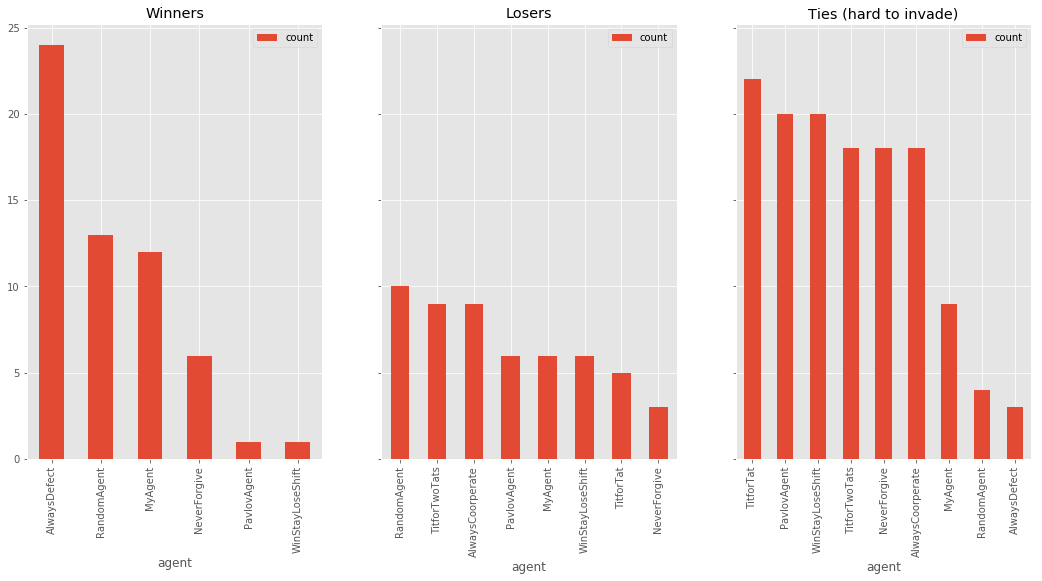

In [16]:
#most victories
from collections import Counter
plt.style.use("ggplot")

fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,8))

pd.DataFrame(Counter(df[df['win'] == True]['agent1']).most_common(), columns=["agent", "count"]).plot(kind='bar', x='agent', ax=ax[0])
ax[0].set_title("Winners")
#most losses

pd.DataFrame(Counter(df[(df['win'] == False) & (df['score_diff'] < 0)]['agent1']).most_common(), columns=["agent", "count"]).plot(kind='bar', x='agent', ax=ax[1])
ax[1].set_title("Losers")

#most ties
pd.DataFrame(Counter(df[df['score_diff'] == 0]['agent1']).most_common(), columns=["agent", "count"]).plot(kind='bar', x='agent', ax=ax[2])
ax[2].set_title("Ties (hard to invade)")
plt.show()



In [ ]:
df['agent1_cat'] = df.agent1.astype("category").cat.codes
df['agent2_cat'] = df.agent2.astype("category").cat.codes
df['game_cat'] = df['agent1_cat'] + df['agent2_cat']

In [ ]:
df.head()

In [ ]:
y = df['win']
X = df[['game_cat', 'n_plays']]

mod = sm.OLS(y, X)    # Describe model

res = mod.fit()       # Fit model

print(res.summary()) 